In [6]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

In [12]:
clustering = AffinityPropagation(random_state=5).fit(x)
clustering
clustering.labels_

array([ 2,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  2,
        1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  3,  2,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  4,  5,  5,  4,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  5,  4,  4,  5,  4,  4,  4,  5,  5,  4,  4,  5,  4,  5,
        4,  4,  5,  4,  7,  5,  8,  5,  7,  6,  8,  6,  8,  5,  8,  6,  7,
        6,  8,  6,  8,  6,  7,  5,  7,  6,  7,  5,  8,  6,  7,  6,  7,  6,
        8,  6,  7,  6,  8,  6,  8,  5,  7,  6,  7,  6,  8,  6,  7, 10,  8,
        6,  8,  6,  7,  6,  7,  6,  8, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9], dtype=int64)

In [13]:
supervised=pd.DataFrame(dataset)

In [16]:
supervised["Cluster_group"]=clustering.labels_

In [17]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


In [18]:
supervised.to_csv("cluster.csv",index=False)

In [19]:
clustering

AffinityPropagation(random_state=5)

C:\Users\Manikandan\Anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


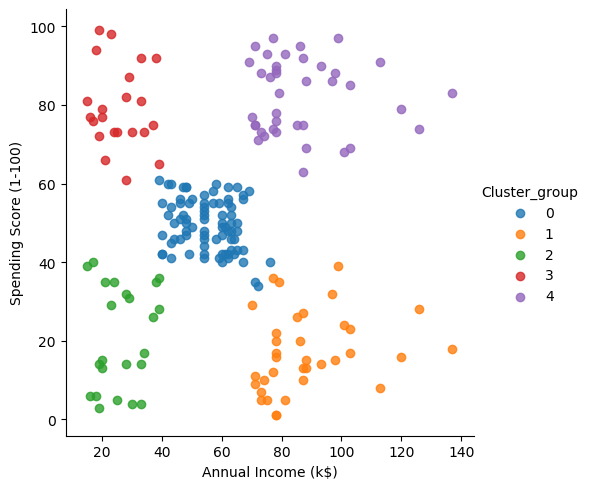

In [21]:
import seaborn as sns

facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)

In [68]:
from sklearn.cluster import AffinityPropagation 

# Compute Affinity Propagation 
af = AffinityPropagation(preference =-6000).fit(x) 
cluster_centers_indices = af.cluster_centers_indices_ 
labels = af.labels_ 

n_clusters_ = len(cluster_centers_indices) 

In [69]:
n_clusters_

8

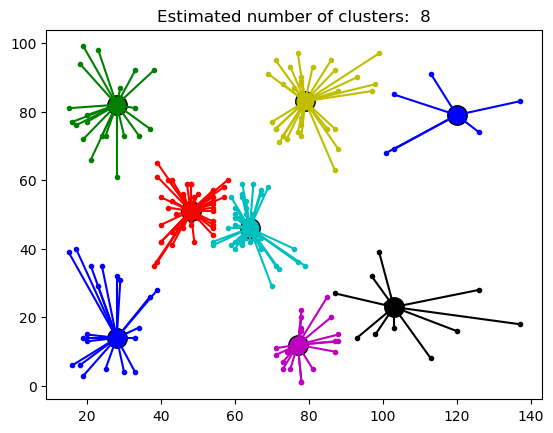

In [70]:
# Plot result 
import matplotlib.pyplot as plt 
from itertools import cycle 

plt.close('all') 
plt.figure(1) 
plt.clf() 

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk') 

for k, col in zip(range(n_clusters_), colors): 
	class_members = labels == k 
	cluster_center = x[cluster_centers_indices[k]] 
	plt.plot(x[class_members, 0], x[class_members, 1], col + '.') 
	plt.plot(cluster_center[0], cluster_center[1], 'o', 
			markerfacecolor = col, markeredgecolor ='k', 
			markersize = 14) 

	for X in x[class_members]: 
		plt.plot([cluster_center[0], X[0]], 
				[cluster_center[1], X[1]], col) 

plt.title('Estimated number of clusters: % d' % n_clusters_) 
plt.show() 